## Project for Psy-3006: Programming and Data Visualization

This project is for the independent course Psy-3006: Programming and Data Visualization. The data contains exam results from students. The purpose of the project is to analyse the students exam results and to visualize them. Gender, exam preparation and the reading, writing and math scores will be looked at. 

In [5]:
import pandas as pd 
import numpy as np

In [6]:
file = "/Users/Annika/Documents/GitHub/project-repo/project-repo/data/StudentsPerformance.csv"
df = pd.read_csv(file)
data = df
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Adding the total marks of each student and the percentage of total marks to the dataset

In [7]:
df["Total marks"] = df["math score"] + df["reading score"] + df["writing score"]
df["Percentage"] = df["Total marks"] / 3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total marks,Percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


#### Adding grades A-F to each score 

Next, grades A to F will be added to each score because we usually have a better understanding of grades compared to scores. The data visualization will also be simpler and easier to understand with grades.

In [31]:
def Grade(marks):
    if marks >= 90:
        grade = 'A'
    elif marks >= 80:
        grade = 'B'
    elif marks >= 70:
        grade = 'C'
    elif marks >= 60:
        grade = 'D'
    elif marks >= 50:
        grade = 'E'
    else:
        grade = 'F'
    return grade
        
        
df["Grade_math"] = df["math score"].apply(lambda s: Grade(s))
df["Grade_reading"] = df["reading score"].apply(lambda s: Grade(s))
df["Grade_writing"] = df["writing score"].apply(lambda s: Grade(s))
df["Overall_grade"] = df["Percentage"].apply(lambda s: Grade(s))
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total marks,Percentage,Grade_math,Grade_reading,Grade_writing,Overall_grade
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,C,C,C,C
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,D,A,B,B
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,A,A,A,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,F,E,F,F
4,male,group C,some college,standard,none,76,78,75,229,76.333333,C,C,C,C


#### Distribution of the math Grades

Now, we can have a look at the distribution of math grades. This will be done with the help of a bar plot to show which grades were achieved most often and which grades were less common.

(0.0, 300.0)

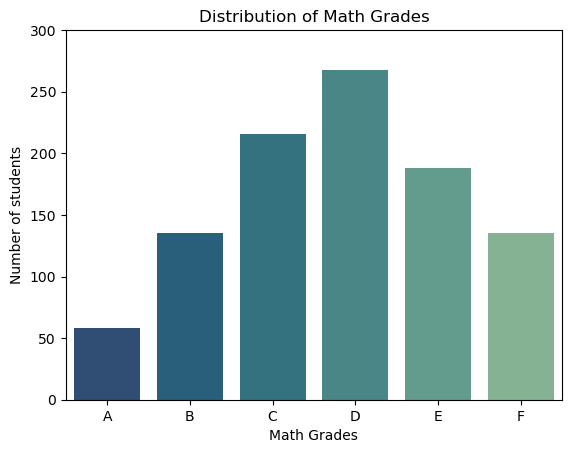

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns 

plt.figure()
grade_order = ["A","B","C","D","E","F"]
sns.countplot(x = "Grade_math", data = df, order = grade_order, palette = "crest_r")
plt.xlabel("Math Grades")
plt.ylabel("Number of students")
plt.title("Distribution of Math Grades")
plt.ylim(0, 300)

You can see that only a few students achieved the grade A, whereas the grade D is the one students got the most.

#### Distribution of reading Grades

Next, the distribution of reading grades will be looked at, also with the help of a bar plot

(0.0, 300.0)

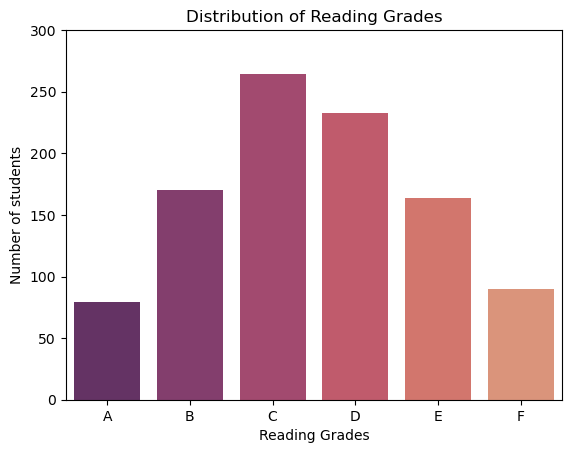

In [33]:
plt.figure()
sns.countplot(x = "Grade_reading", data = df, order = grade_order, palette = "flare_r")
plt.xlabel("Reading Grades")
plt.ylabel("Number of students")
plt.title("Distribution of Reading Grades")
plt.ylim(0, 300)

As you can see from the bars, grade C was achieved most from the students, followed by the grade D.

#### Distribution of writing Grades

Next, the distribution of writing grades will be looked at with a bar plot. 

(0.0, 300.0)

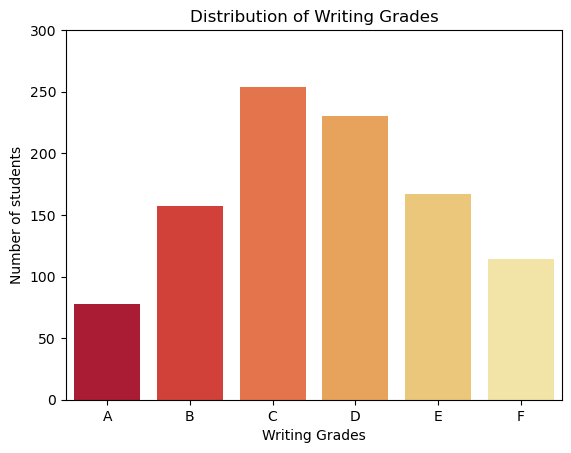

In [34]:
plt.figure()
sns.countplot(x = "Grade_writing", data = df, order = grade_order, palette = "YlOrRd_r")
plt.xlabel("Writing Grades")
plt.ylabel("Number of students")
plt.title("Distribution of Writing Grades")
plt.ylim(0, 300)

Just like the reading grades, the grade C was achievd most often.

#### Is there a Correlation between writing and reading?

Now with the help of a scatterplot, we will analyse if there is a correlation between writing and reading scores. 

Text(0.5, 1.0, 'Correlation between reading and writing Score')

<Figure size 640x480 with 0 Axes>

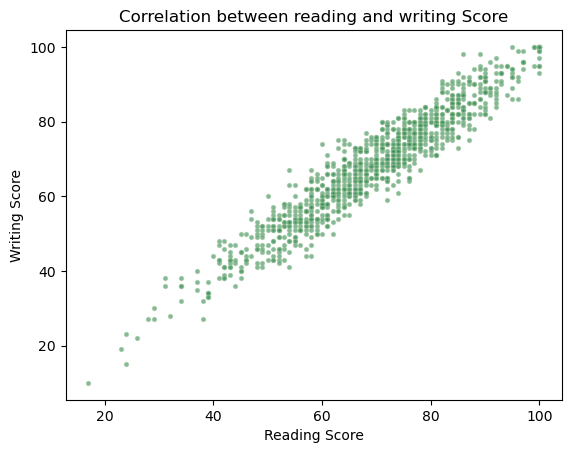

In [35]:
plt.figure()
reading = df["reading score"]
writing = df["writing score"]

fig, ax = plt.subplots()
ax.scatter(x=reading, y=writing, c="seagreen", edgecolors = "darkseagreen", alpha = 0.6, s = 8)
plt.xlabel("Reading Score")
plt.ylabel("Writing Score")
plt.title("Correlation between reading and writing Score")


Calculating the actual correlation:

In [36]:
correlation = np.corrcoef(reading, writing)[0,1]
print(correlation)

0.954598077146248


From the scatterplot and from the calculation you can tell that there is a very strong correlation between reading and writing scores. Reading and writing skills seem to be related. 

#### Is there a Correlation between math and reading? 

Next, it will be analysed if there is a correlation between math and reading scores. A scatterplot will show whether there is a correlation or not. 

Text(0.5, 1.0, 'Correlation between reading and math Score')

<Figure size 640x480 with 0 Axes>

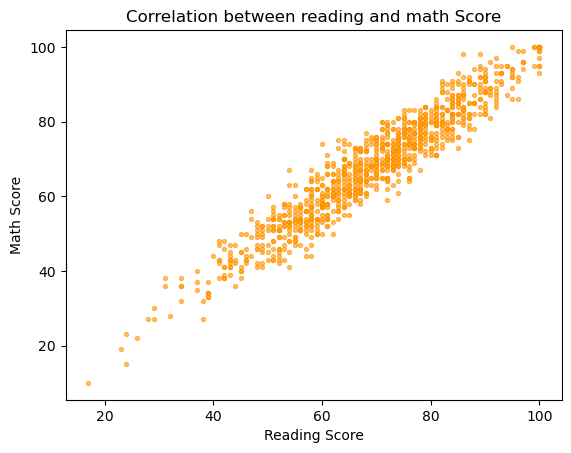

In [37]:
plt.figure()
reading = df["reading score"]
math = df["math score"]

fig, ax = plt.subplots()
ax.scatter(x=reading, y=writing, c="orange", edgecolors = "darkorange", alpha = 0.6, s = 8)
plt.xlabel("Reading Score")
plt.ylabel("Math Score")
plt.title("Correlation between reading and math Score")

Calculating the actual correlation:

In [38]:
correlation = np.corrcoef(reading, math)[0,1]
print(correlation)

0.8175796636720539


Again, there seems to be a very strong correlation between reading and math scores. Reading might be related to math scores because a lot of math problems involve word problems. 

#### Distribution of Male and Female with a Pie Chart

Now, we will look at the distribution of males and females. A pie chart will be used for visualization. 

482
518


Text(0.5, 1.0, 'Amount of Females and Males')

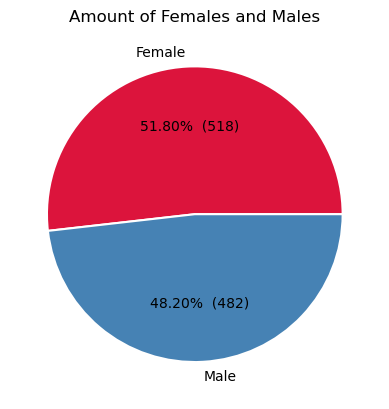

In [39]:
gender = df["gender"]

filter_female = df["gender"] == "female"
filter_male = df["gender"] == "male"

print(df['gender'].value_counts()['male'])     
print(df['gender'].value_counts()['female'])  

amount_male = 482
amount_female = 518

gender = ["Female", "Male"]
g_amount = [518,482]
g_colors = ["crimson", "steelblue"]


def make_autopct(g_amount):
    def my_autopct(pct):
        total = sum(g_amount)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

fig, ax = plt.subplots()
plt.pie(g_amount, labels = gender, colors = g_colors, wedgeprops={'linewidth': 1.5, 'edgecolor': 'white'}, autopct = make_autopct(g_amount))
plt.title("Amount of Females and Males")

There seems to be more females than males who took the exams.

#### Countplot for Gender and Grades

Now  we will have a look at the different genders and how they performed in the exams compared to each other. We have to keep in mind though that there has been more females than males taking the exams. 

(0.0, 160.0)

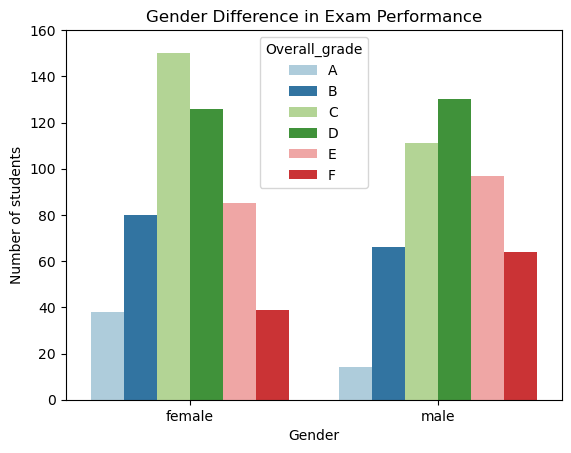

In [40]:
plt.figure()
sns.countplot(x = "gender", data = df, hue = "Overall_grade", hue_order = grade_order, palette = "Paired")
plt.xlabel("Gender")
plt.ylabel("Number of students")
plt.title("Gender Difference in Exam Performance")
plt.ylim(0, 160)

From the plot you can tell that females overall achieved better grades than males. The mode for females is the grade C wheras the mode for males is the grade D. Again, you need to keep in mind though that there has been more females than males in the data set. 

#### Pie chart of course preparation

Some students completed a test preparation course and some students didn't. With the help of a pie chart, we will visualize how many students completed the course

358
642


Text(0.5, 1.0, 'Course Preparation')

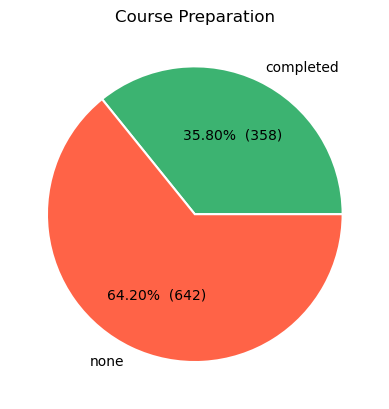

In [41]:
filter_completed = df["test preparation course"] == "completed"
filter_none = df["test preparation course"] == "none"

print(df['test preparation course'].value_counts()['completed'])     
print(df['test preparation course'].value_counts()['none'])  

amount_completed = 358
amount_none = 642

course_prep = ["completed", "none"]
prep_amount = [358,642]
prep_colors = ["mediumseagreen", "tomato"]

def make_autopct(prep_amount):
    def my_autopct(pct):
        total = sum(prep_amount)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

fig, ax = plt.subplots()
plt.pie(prep_amount, labels = course_prep, colors = prep_colors, wedgeprops={'linewidth': 1.5, 'edgecolor': 'white'}, autopct = make_autopct(prep_amount))
plt.title("Course Preparation")

From the visualization you can see that most students didn't complete their preparation course.

#### Preparation for the Exam and it's Outcome

Now we will investigate whether the students who completed the preparation course achieved higher grades than the ones who didn't. 

(0.0, 180.0)

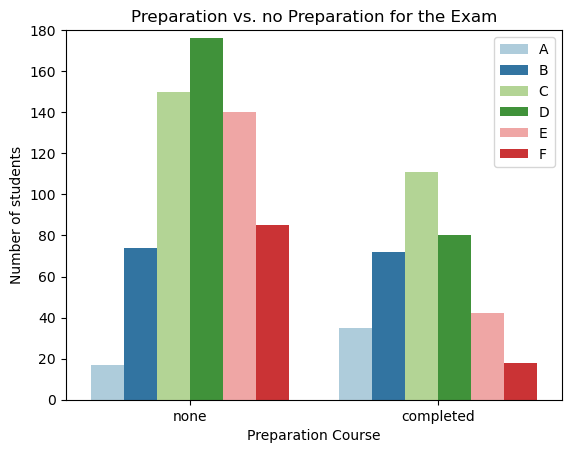

In [42]:
plt.figure()
sns.countplot(x = "test preparation course", hue = "Overall_grade", data = df, hue_order = grade_order,palette = "Paired")
plt.legend()
plt.xlabel("Preparation Course")
plt.ylabel("Number of students")
plt.title("Preparation vs. no Preparation for the Exam")
plt.ylim(0, 180)

Of course, you need to keep in mind that there has been more people who didn't complete the course. But it still seems like the students who finished their preparation course overall achied better grades, since the mode is the Grade C and the mode for the people who didn't finish the course is the grade D.

#### Gender and Course Preparation

Lastly, we will have a look at the gender difference in completing the course preparation with the help of a countplot. 

Text(0.5, 1.0, 'Gender Difference in Course Preparation')

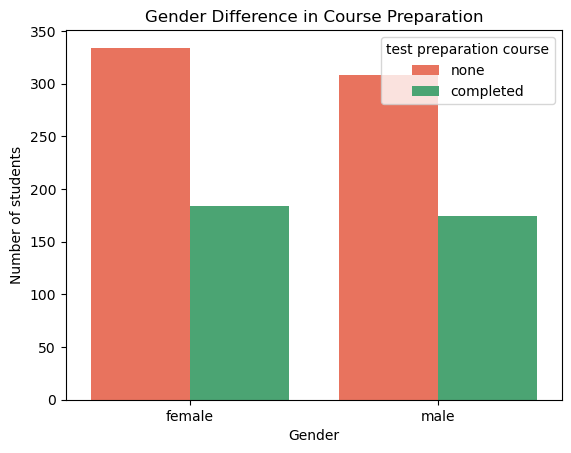

In [43]:
colors_np = ["tomato", "mediumseagreen"]

plt.figure()
sns.countplot(x = "gender", data = df, hue = "test preparation course", palette = colors_np)
plt.xlabel("Gender")
plt.ylabel("Number of students")
plt.title("Gender Difference in Course Preparation")

As far as you can see from the plot, it doesn't seem like there is any gender difference in completing the preparation course. 